Load molecules in mini drug bank and generate:
* oeb version with omega and charge
* explicit tagged SMILES
* png or pdf of molecules with pid


In [32]:
%matplotlib inline
from IPython.display import display

from openforcefield.utils import read_molecules
from openmoltools.openeye import get_charges
from openeye import oechem, oeomega, oedepict, oeiupac
import oenotebook

from torsionfit.qmscan import fragment, utils
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read molecules for MiniDrugBank
tri_file = 'MiniDrugBank_tripos.mol2'
molecules = read_molecules(tri_file)

Loading molecules from 'MiniDrugBank_tripos.mol2'...
371 molecules read
0.116 s elapsed


In [3]:
# Write out tagged smiles
utils.mol_to_tagged_smiles('MiniDrugBank_tripos.mol2', 'MiniDrugBank_mappedSMILES.smi')

In [4]:
def to_pdf(molecules, oname):    
    itf = oechem.OEInterface()
    PageByPage = True

    rows, cols = 5, 3
    ropts = oedepict.OEReportOptions(rows, cols)
    ropts.SetHeaderHeight(25)
    ropts.SetFooterHeight(25)
    ropts.SetCellGap(2)
    ropts.SetPageMargins(10)
    report = oedepict.OEReport(ropts)

    cellwidth, cellheight = report.GetCellWidth(), report.GetCellHeight()
    opts = oedepict.OE2DMolDisplayOptions(cellwidth, cellheight, oedepict.OEScale_AutoScale)
    oedepict.OESetup2DMolDisplayOptions(opts, itf)

    for mol in molecules:
        cell = report.NewCell()
        oedepict.OEPrepareDepiction(mol)
        disp = oedepict.OE2DMolDisplay(mol, opts)
        oedepict.OERenderMolecule(cell, disp)
        oedepict.OEDrawCurvedBorder(cell, oedepict.OELightGreyPen, 10.0)

    oedepict.OEWriteReport(oname, report)

In [28]:
# Sort molecules by # of heavy atoms
test_mol = molecules[0]

In [5]:
# Sort by # of heavy atoms
mol_size = []
for mol in molecules:
    mol_size.append(mol.NumAtoms())

In [13]:
sorted_mols = [x for _,x in sorted(zip(mol_size,molecules))]
sorted_size = [x for x, _ in sorted(zip(mol_size,molecules))]

In [7]:
to_pdf(sorted_mols, 'sorted_drug_bank.pdf')

In [8]:
# Write out first 150 molecules to smi
ofs = oechem.oemolostream()
ofs.open('sorted_drug_bank.smi')
for mol in sorted_mols[:150]:
    smiles = utils.create_mapped_smiles(mol)
    oechem.OEWriteMolecule(ofs, mol)

In [10]:
# Try to fragment some
output_dir = os.path.dirname(os.path.realpath('__file__'))
fragment.generate_fragments('sorted_drug_bank.smi', output_dir=output_dir, MAX_ROTORS=3, strict_stereo=False, pdf=True)

16:51:36 INFO torsionFit: fragmenting DrugBank_2077...
16:51:36 INFO torsionFit: fragmenting DrugBank_2642...
16:51:37 WARNING torsionFit: WBO were not calculate. Cannot fragment molecule BLAH
16:51:37 WARNING torsionFit: Skipping DrugBank_2642
16:51:37 INFO torsionFit: fragmenting DrugBank_2728...
16:51:37 INFO torsionFit: fragmenting DrugBank_3353...
16:51:37 INFO torsionFit: fragmenting DrugBank_2519...
16:51:37 INFO torsionFit: fragmenting DrugBank_423...
16:51:37 INFO torsionFit: fragmenting DrugBank_1722...
16:51:37 INFO torsionFit: fragmenting DrugBank_2538...
16:51:37 INFO torsionFit: fragmenting DrugBank_3046...
16:51:37 INFO torsionFit: fragmenting DrugBank_416...
16:51:38 INFO torsionFit: fragmenting DrugBank_3945...
16:51:38 INFO torsionFit: fragmenting DrugBank_443...
16:51:38 INFO torsionFit: fragmenting DrugBank_1480...
16:51:38 INFO torsionFit: fragmenting DrugBank_2986...
16:51:38 INFO torsionFit: fragmenting DrugBank_2991...
16:51:38 INFO torsionFit: fragmenting DrugB

16:51:56 INFO torsionFit: fragmenting DrugBank_1971...
16:51:57 INFO torsionFit: fragmenting DrugBank_1991...
16:51:59 INFO torsionFit: fragmenting DrugBank_5034...
16:51:59 INFO torsionFit: fragmenting DrugBank_546...
16:52:00 INFO torsionFit: fragmenting DrugBank_3406...
16:52:00 INFO torsionFit: fragmenting DrugBank_6160...
16:52:01 INFO torsionFit: fragmenting DrugBank_1633...
16:52:02 INFO torsionFit: fragmenting DrugBank_2048...
16:52:02 INFO torsionFit: fragmenting DrugBank_442...
16:52:02 INFO torsionFit: fragmenting DrugBank_764...
16:52:03 INFO torsionFit: fragmenting DrugBank_3590...
16:52:04 INFO torsionFit: fragmenting DrugBank_4136...
16:52:05 INFO torsionFit: fragmenting DrugBank_5285...
16:52:05 INFO torsionFit: fragmenting DrugBank_3087...
16:52:06 INFO torsionFit: fragmenting DrugBank_6145...
16:52:06 INFO torsionFit: fragmenting DrugBank_6567...
16:52:07 INFO torsionFit: fragmenting DrugBank_1982...
16:52:08 INFO torsionFit: fragmenting DrugBank_2017...
16:52:09 INFO

16:54:39 WARNING torsionFit: WBO were not calculate. Cannot fragment molecule (2~{R})-2-amino-3-[[(3~{S})-5-[(~{R})-amino(carboxy)methyl]-2,3-dihydroisoxazol-3-yl]sulfanyl]propanoic acid
16:54:39 WARNING torsionFit: Skipping DrugBank_1728
16:54:39 INFO torsionFit: fragmenting DrugBank_2358...
16:54:40 INFO torsionFit: fragmenting DrugBank_5313...
16:54:40 INFO torsionFit: fragmenting DrugBank_5449...
16:54:43 INFO torsionFit: fragmenting DrugBank_2998...
16:54:45 INFO torsionFit: fragmenting DrugBank_3752...
16:54:46 INFO torsionFit: fragmenting DrugBank_4593...
16:54:48 INFO torsionFit: fragmenting DrugBank_7049...
16:54:49 INFO torsionFit: fragmenting DrugBank_5407...
16:54:51 INFO torsionFit: fragmenting DrugBank_128...
16:54:52 INFO torsionFit: fragmenting DrugBank_3014...
16:54:53 INFO torsionFit: fragmenting DrugBank_5902...
16:54:55 INFO torsionFit: fragmenting DrugBank_6232...
16:54:56 INFO torsionFit: fragmenting DrugBank_3913...
16:54:57 WARNING torsionFit: WBO were not calcu

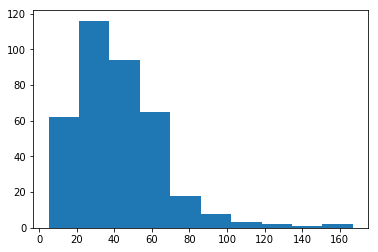

In [31]:
# Plot distribution of heavy atoms;
plt.hist(sorted_size);

In [22]:
frag_list_1 = read_molecules('nrotor_1.smi')
frag_list_2 = read_molecules('nrotor_2.smi')
frag_list_3 = read_molecules('nrotor_3.smi')
frag_list_4 = read_molecules('nrotor_4.smi')
frag_list_5 = read_molecules('nrotor_5.smi')

Loading molecules from 'nrotor_1.smi'...
160 molecules read
0.038 s elapsed
Loading molecules from 'nrotor_2.smi'...
147 molecules read
0.010 s elapsed
Loading molecules from 'nrotor_3.smi'...
95 molecules read
0.012 s elapsed
Loading molecules from 'nrotor_4.smi'...
13 molecules read
0.002 s elapsed
Loading molecules from 'nrotor_5.smi'...
1 molecules read
0.001 s elapsed


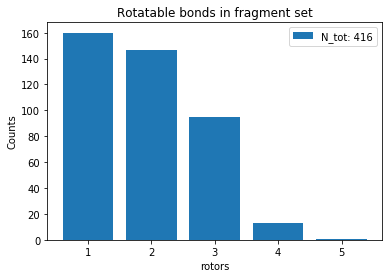

In [42]:
rotors = {1:160, 2:147, 3:95, 4:13, 5:1}
plt.bar(list(rotors.keys()), list(rotors.values()), label='N_tot: 416');
plt.xlabel('rotors')
plt.ylabel('Counts')
plt.title('Rotatable bonds in fragment set')
plt.legend();
plt.savefig('rot_bonds.png')

In [38]:
# Plot distribution of heavy atoms of fragments
all_frags = [frag_list_1, frag_list_2, frag_list_3, frag_list_4, frag_list_5]
frag_size = {}
h_atoms = []
for i, frag_set in enumerate(all_frags):
    frag_size[i] = np.zeros(len(frag_set))
    for j, frag in enumerate(frag_set):
        atoms = frag.NumAtoms()
        h_atoms.append(atoms)
        frag_size[i][j] = atoms

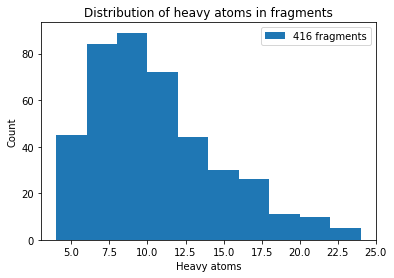

In [43]:
plt.hist(h_atoms, label = '416 fragments');
plt.xlabel('Heavy atoms')
plt.ylabel('Count')
plt.title('Distribution of heavy atoms in fragments');
plt.legend()
plt.savefig('heavy_atoms.png')